### Dữ liệu cho phần bài tập

In [23]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
cl_df = pd.io.stata.read_stata("https://www.stata-press.com/data/r17/cholesterol.dta")

In [3]:
cl_df.head(20)

,race,agegrp,chol,agemidpt,meangrp
0,White,10–19,188.962997,15.0,179.853088
1,Black,10–19,179.729446,15.0,179.853088
2,Other,10–19,169.779404,15.0,179.853088
3,Black,10–19,176.760956,15.0,179.853088
4,Other,10–19,182.571182,15.0,179.853088
5,Black,10–19,181.808868,15.0,179.853088
6,Black,10–19,187.074249,15.0,179.853088
7,White,10–19,178.875641,15.0,179.853088
8,Other,10–19,180.069916,15.0,179.853088
9,White,10–19,192.537003,15.0,179.853088


### Bài tập về nhà (phần 2)

So sánh trung bình cholesterol của các nhóm sắc tộc khác nhau (race vs chol) -> Anova one-way.

In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Đây là một cách khác để kiểm định Anova (one-way) -> Cách này là tốt nhất cho Anova!!!
# Ordinary Least Squares (OLS) model
model = ols('chol ~ C(race)', data=cl_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(race),669.278235,2.0,1.108161,0.33573
Residual,21742.341205,72.0,NaN,NaN


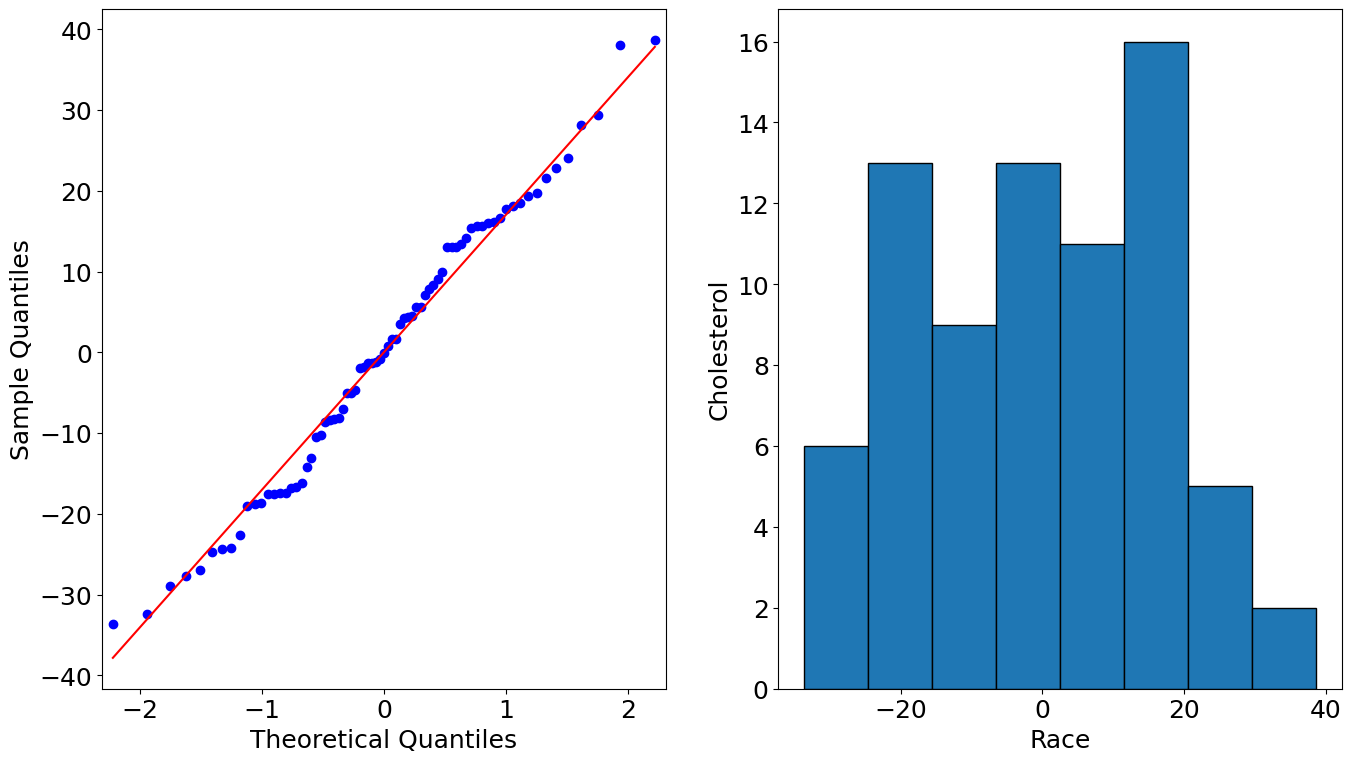

In [29]:
fig, ax = plt.subplots(1, 2)
# model.resid -> các giá trị thặng dư của model: dùng nó để kiểm tra điều kiện cho Anova

sm.qqplot(model.resid, line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Race")
plt.ylabel('Cholesterol')
plt.show()
#stats.shapiro(model.resid)

In [15]:
chol = cl_df['chol']
racegrp = cl_df.groupby('race').groups
black = chol[racegrp['Black']]
white = chol[racegrp['White']]
other = chol[racegrp['Other']]

In [16]:
# Kiểm tra phân phối chuẩn black
from scipy.stats import shapiro
stat_black, p_black = shapiro(black)
print('stat=%.3f, p=%.3f' % (stat_black, p_black))
if p_black > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.968, p=0.584
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


In [17]:
# Kiểm tra phân phối chuẩn white :
stat_white, p_white = shapiro(white)
print('stat=%.3f, p=%.3f' % (stat_white, p_white))
if p_white > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.967, p=0.581
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


In [18]:
# Kiểm tra phân phối chuẩn others:
stat_other, p_other = shapiro(other)
print('stat=%.3f, p=%.3f' % (stat_other, p_other))
if p_other > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('-'*50)
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.952, p=0.280
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Đủ điều kiện để phân tích tiếp


Phát biểu giả thiết:

- $H_0$: Trung bình hàm lượng cholesteron giữa các nhóm là bằng nhau
- $H_1$: Trung bình hàm lượng cholesteron giữa các nhóm không bằng nhau

In [19]:
# Tiến hành phân tích ANOVA 1 chiều
from scipy.stats import f_oneway

std2 , p2 = f_oneway(black, white, other)
print('P_value = ',p2)
alpha = 0.05
if (p2 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm không có sự khác biệt.')

P_value =  0.33573021801437203
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm không có sự khác biệt.


Hậu kiểm:

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=cl_df['chol'],
                          groups=cl_df['race'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Black,Other,-5.7153,0.4808,-17.4778,6.0473,False
Black,White,-6.8147,0.3542,-18.5773,4.9478,False
Other,White,-1.0995,0.9,-12.862,10.6631,False


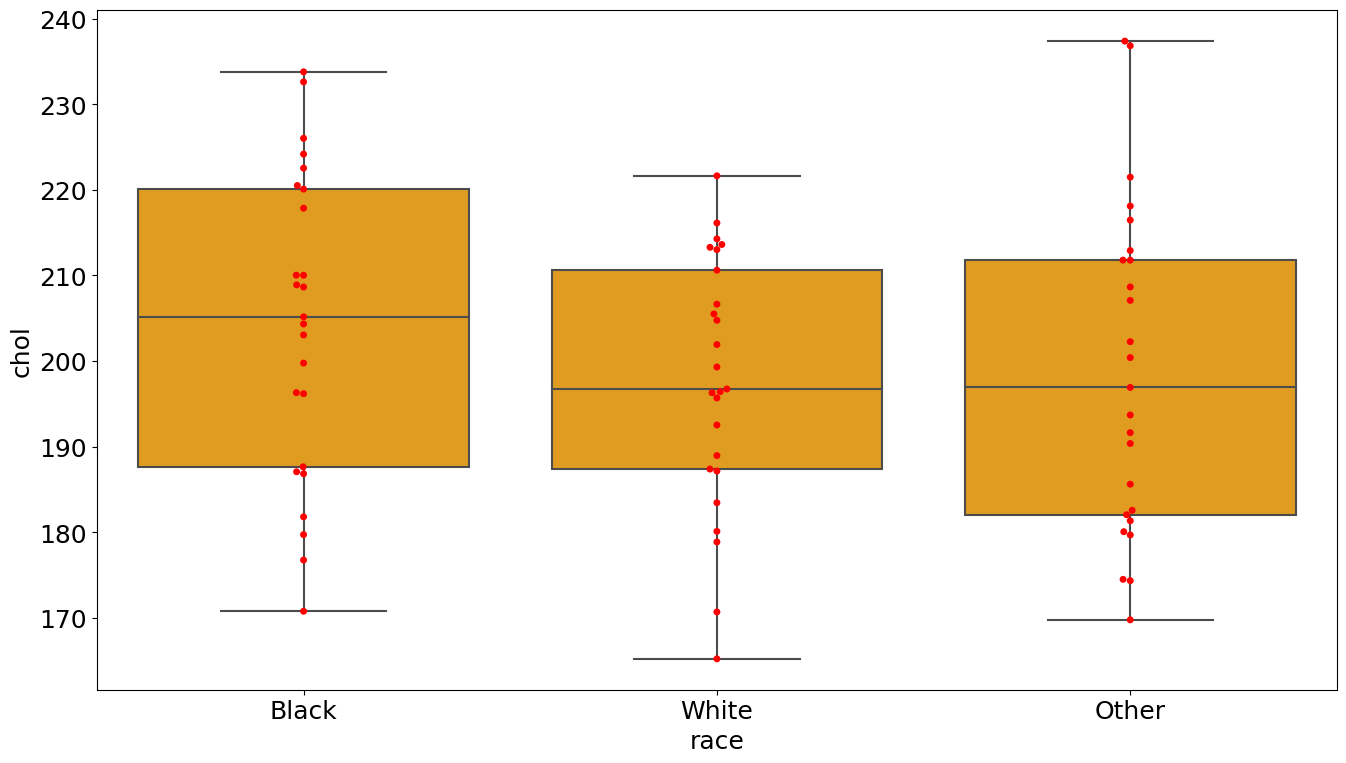

In [27]:
# Kỹ thuật EDA:
sns.boxplot(x='race', y='chol', data=cl_df, color='orange')
sns.swarmplot(x="race", y="chol", data=cl_df, color='red')
plt.show()